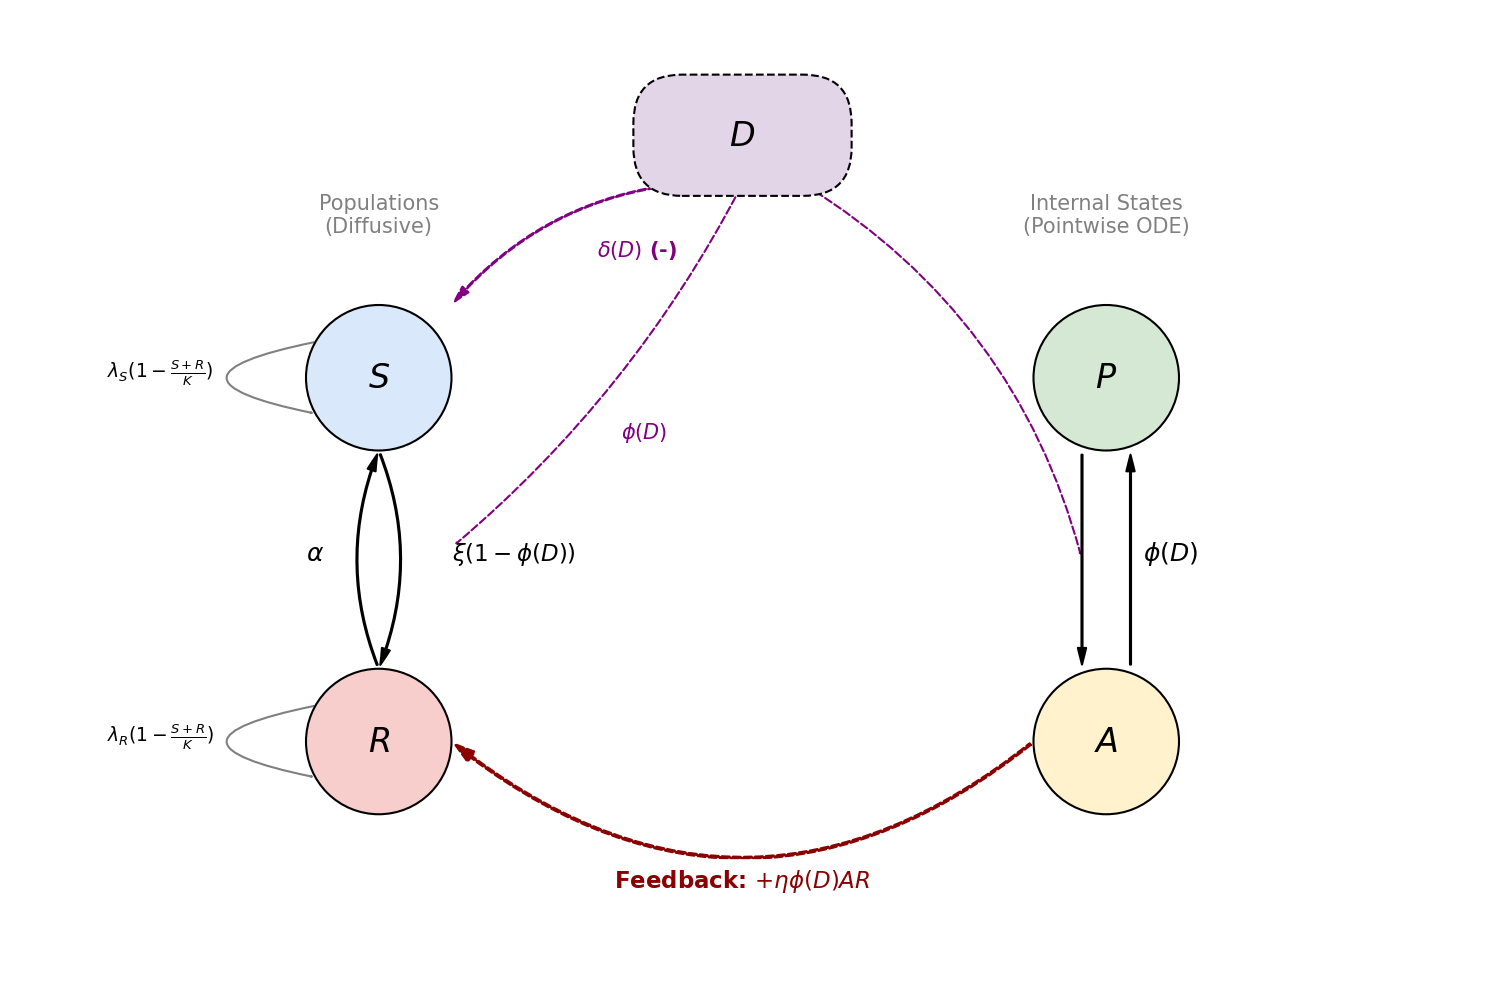

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# 设置绘图风格
plt.figure(figsize=(10, 7), dpi=150)
ax = plt.gca()
ax.set_aspect('equal')
plt.axis('off')  # 关闭坐标轴

# ---------------------------------------------------------
# 1. 定义节点位置 (Coordinates)
# ---------------------------------------------------------
# 左侧 (Populations)
pos_S = (-3, 1)
pos_R = (-3, -2)

# 右侧 (Internal States)
pos_P = (3, 1)
pos_A = (3, -2)

# 上方/中心 (Signal)
pos_D = (0, 3)

# ---------------------------------------------------------
# 2. 绘制节点 (Nodes)
# ---------------------------------------------------------
def draw_node(pos, label, color, shape='circle', size=0.6):
    x, y = pos
    if shape == 'circle':
        circle = patches.Circle((x, y), radius=size, edgecolor='black', facecolor=color, zorder=2)
        ax.add_patch(circle)
    elif shape == 'cloud':
        # 用圆角矩形/椭圆模拟云状/独特形状
        box = patches.FancyBboxPatch((x-0.8, y-0.4), 1.6, 0.8,
                                     boxstyle="round,pad=0.1,rounding_size=0.4",
                                     edgecolor='black', facecolor=color, zorder=2, linestyle='--')
        ax.add_patch(box)

    plt.text(x, y, label, ha='center', va='center', fontsize=16, fontweight='bold', zorder=3)

# 绘制具体节点
draw_node(pos_S, '$S$', '#dae8fc')  # 浅蓝
draw_node(pos_R, '$R$', '#f8cecc')  # 浅红
draw_node(pos_P, '$P$', '#d5e8d4')  # 浅绿
draw_node(pos_A, '$A$', '#fff2cc')  # 浅黄
draw_node(pos_D, '$D$', '#e1d5e7', shape='cloud') # 浅紫 (信号)

# 标题 (Populations vs Internal States)
plt.text(-3, 2.2, "Populations\n(Diffusive)", ha='center', fontsize=10, color='gray')
plt.text(3, 2.2, "Internal States\n(Pointwise ODE)", ha='center', fontsize=10, color='gray')

# ---------------------------------------------------------
# 3. 绘制实线箭头 (Solid Interactions)
# ---------------------------------------------------------
style_arrow = "Simple, tail_width=0.5, head_width=4, head_length=8"

# S -> R (常数迁移 alpha)
arrow_SR = patches.FancyArrowPatch(
    (pos_S[0], pos_S[1]-0.6), (pos_R[0], pos_R[1]+0.6),
    connectionstyle="arc3,rad=-0.2", color="black", arrowstyle=style_arrow, zorder=1
)
ax.add_patch(arrow_SR)
plt.text(-3.6, -0.5, r'$\alpha$', fontsize=12)

# R -> S (受控迁移)
arrow_RS = patches.FancyArrowPatch(
    (pos_R[0], pos_R[1]+0.6), (pos_S[0], pos_S[1]-0.6),
    connectionstyle="arc3,rad=-0.2", color="black", arrowstyle=style_arrow, zorder=1
)
ax.add_patch(arrow_RS)
plt.text(-2.4, -0.5, r'$\xi(1-\phi(D))$', fontsize=11)

# P <-> A (内部状态转换)
# P -> A
arrow_PA = patches.FancyArrowPatch(
    (pos_P[0]-0.2, pos_P[1]-0.6), (pos_A[0]-0.2, pos_A[1]+0.6),
    connectionstyle="arc3,rad=0", color="black", arrowstyle=style_arrow, zorder=1
)
ax.add_patch(arrow_PA)

# A -> P
arrow_AP = patches.FancyArrowPatch(
    (pos_A[0]+0.2, pos_A[1]+0.6), (pos_P[0]+0.2, pos_P[1]-0.6),
    connectionstyle="arc3,rad=0", color="black", arrowstyle=style_arrow, zorder=1
)
ax.add_patch(arrow_AP)
plt.text(3.3, -0.5, r'$\phi(D)$', fontsize=12)

# ---------------------------------------------------------
# 4. 绘制自环 (Self-loops - Logistic Growth)
# ---------------------------------------------------------
# S 的 Logistic
arc_S = patches.FancyArrowPatch(
    (pos_S[0]-0.5, pos_S[1]+0.3), (pos_S[0]-0.5, pos_S[1]-0.3),
    connectionstyle="arc3,rad=2.5", color="gray", arrowstyle="->", linestyle="solid", zorder=1
)
ax.add_patch(arc_S)
plt.text(-4.8, 1, r'$\lambda_S(1-\frac{S+R}{K})$', fontsize=9, ha='center')

# R 的 Logistic
arc_R = patches.FancyArrowPatch(
    (pos_R[0]-0.5, pos_R[1]+0.3), (pos_R[0]-0.5, pos_R[1]-0.3),
    connectionstyle="arc3,rad=2.5", color="gray", arrowstyle="->", linestyle="solid", zorder=1
)
ax.add_patch(arc_R)
plt.text(-4.8, -2, r'$\lambda_R(1-\frac{S+R}{K})$', fontsize=9, ha='center')

# ---------------------------------------------------------
# 5. 绘制虚线调节箭头 (Dashed Signal Regulation)
# ---------------------------------------------------------
style_dashed = "Simple, tail_width=0.5, head_width=4, head_length=8"

# D -> S (抑制 delta(D))
arrow_DS = patches.FancyArrowPatch(
    (pos_D[0]-0.5, pos_D[1]-0.4), (pos_S[0]+0.6, pos_S[1]+0.6),
    connectionstyle="arc3,rad=0.2", color="purple", arrowstyle=style_dashed, linestyle="--", zorder=1
)
ax.add_patch(arrow_DS)
# 标注背景设为白色以便看清
t = plt.text(-1.2, 2.0, r'$\delta(D)$ (-)', fontsize=10, color='purple', fontweight='bold')
t.set_bbox(dict(facecolor='white', alpha=0.7, edgecolor='none'))

# D -> (R->S 迁移) 的调节
# 我们指向 R->S 箭头的中间位置大致坐标 (-2.5, -0.5)
arrow_DRS = patches.FancyArrowPatch(
    (pos_D[0], pos_D[1]-0.4), (-2.4, -0.4),
    connectionstyle="arc3,rad=-0.1", color="purple", arrowstyle="->", linestyle="--", zorder=0
)
ax.add_patch(arrow_DRS)
t2 = plt.text(-1.0, 0.5, r'$\phi(D)$', fontsize=10, color='purple')
t2.set_bbox(dict(facecolor='white', alpha=0.7, edgecolor='none'))

# D -> (P <-> A) 的调节
arrow_DPA = patches.FancyArrowPatch(
    (pos_D[0]+0.5, pos_D[1]-0.4), (2.8, -0.5),
    connectionstyle="arc3,rad=-0.2", color="purple", arrowstyle="->", linestyle="--", zorder=0
)
ax.add_patch(arrow_DPA)


# ---------------------------------------------------------
# 6. 绘制反馈 (Feedback A -> R)
# ---------------------------------------------------------
# 从 A 指向 R，粗虚线
arrow_Feed = patches.FancyArrowPatch(
    (pos_A[0]-0.6, pos_A[1]), (pos_R[0]+0.6, pos_R[1]),
    connectionstyle="arc3,rad=-0.4",
    color="darkred",
    arrowstyle="Simple, tail_width=1, head_width=6, head_length=10", # 粗箭头
    linestyle="--",
    zorder=1
)
ax.add_patch(arrow_Feed)
t3 = plt.text(0, -3.2, r'Feedback: $+\eta \phi(D) A R$', fontsize=11, ha='center', color='darkred', fontweight='bold')
t3.set_bbox(dict(facecolor='white', alpha=0.8, edgecolor='none'))

# 调整视野范围
plt.xlim(-6, 6)
plt.ylim(-4, 4)

# 保存或显示
plt.tight_layout()
# plt.savefig('model_interaction_diagram.png', dpi=300) # 去掉注释以保存
plt.show()

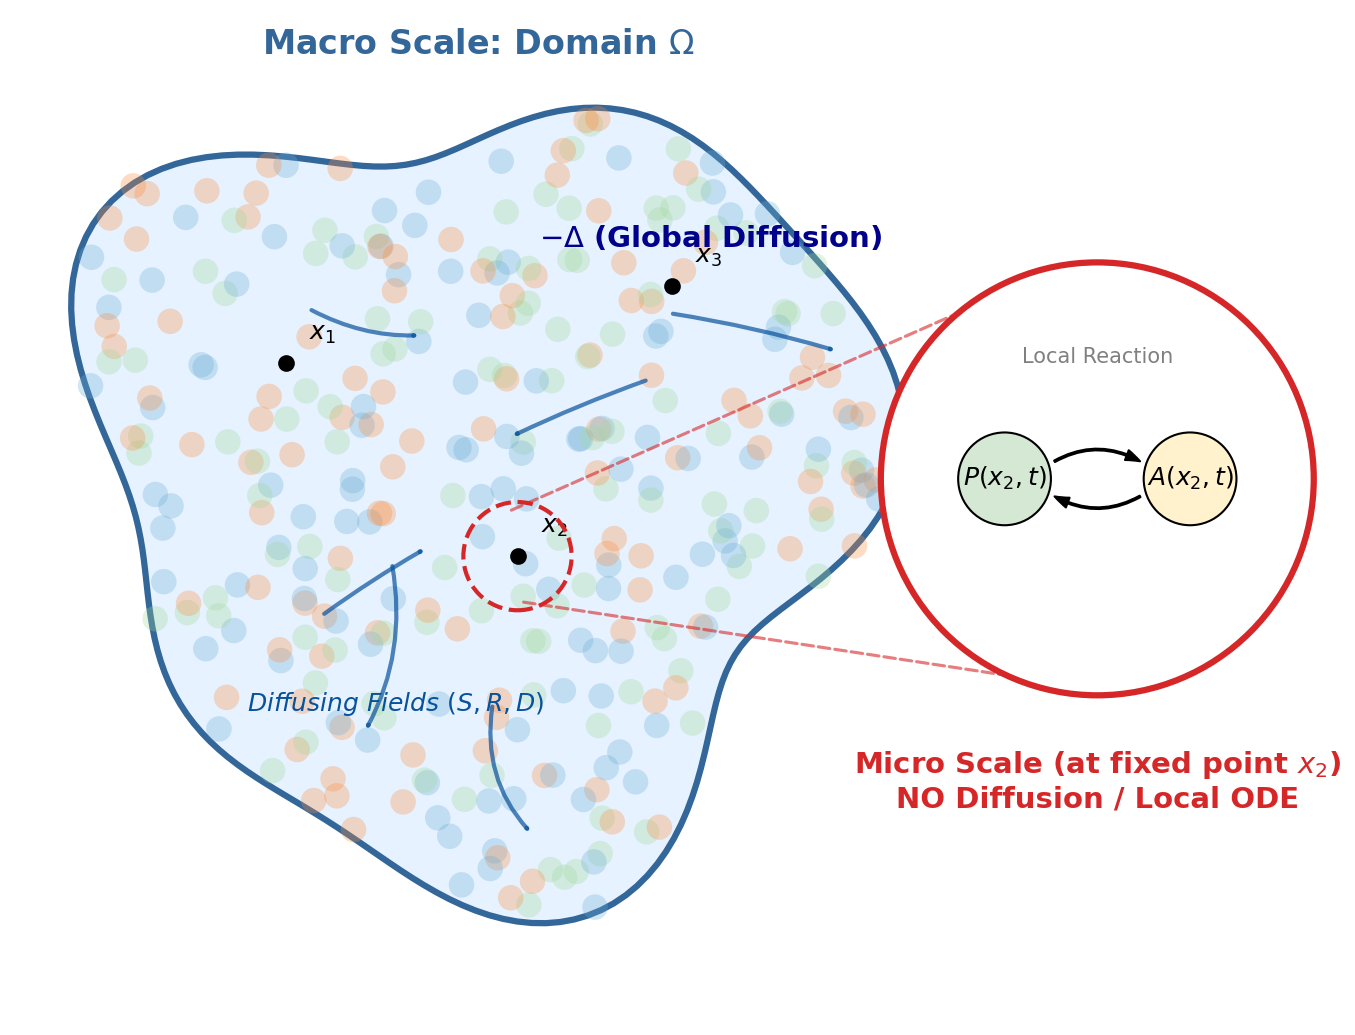

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
from matplotlib.path import Path

# 设置绘图风格
fig, ax = plt.subplots(figsize=(12, 7), dpi=150)
ax.set_aspect('equal')
ax.axis('off')
# 设置坐标轴范围以容纳所有元素
ax.set_xlim(-2, 15)
ax.set_ylim(-3, 10)

# ==========================================
# 1. 宏观尺度区域 (Macro Scale Domain Omega)
# ==========================================

# --- 定义不规则区域边界 ---
theta = np.linspace(0, 2*np.pi, 200)
# 使用几个正弦波叠加生成不规则半径
r = 5 + 0.6 * np.sin(3*theta) + 0.4 * np.cos(5*theta)
domain_center_x, domain_center_y = 4, 4
x_domain = domain_center_x + r * np.cos(theta)
y_domain = domain_center_y + r * np.sin(theta)

domain_path_coords = np.column_stack((x_domain, y_domain))
domain_patch = patches.Polygon(domain_path_coords, closed=True,
                               facecolor='#e6f2ff', # 浅蓝背景
                               edgecolor='#336699', # 深蓝边界
                               linewidth=3, zorder=1)
ax.add_patch(domain_patch)

ax.text(domain_center_x, 9.5, r'Macro Scale: Domain $\Omega$',
        ha='center', fontsize=16, fontweight='bold', color='#336699')

# --- 可视化扩散场 (S, R, D) ---
# 方法：在区域内散布模糊的彩色点来模拟连续场
np.random.seed(42) # 固定随机种子以保证结果可复现
num_points = 500
# 生成一个边界框内的随机点
px = np.random.uniform(min(x_domain), max(x_domain), num_points)
py = np.random.uniform(min(y_domain), max(y_domain), num_points)

# 使用 Path.contains_points 筛选出在区域内部的点
path = Path(domain_path_coords)
mask = path.contains_points(np.column_stack((px, py)))
px_in, py_in = px[mask], py[mask]

# 绘制代表 S, R, D 的混合场
colors = np.random.choice(['#6baed6', '#fd8d3c', '#a1d99b'], size=len(px_in))
ax.scatter(px_in, py_in, c=colors, s=150, alpha=0.3, edgecolors='none', zorder=2)

# 添加波浪箭头表示移动/扩散
style_wave = "Simple, tail_width=0.5, head_width=4, head_length=6"
for _ in range(6):
    start_x = domain_center_x + np.random.uniform(-3, 3)
    start_y = domain_center_y + np.random.uniform(-3, 3)
    # 随机方向
    angle = np.random.uniform(0, 2*np.pi)
    length = np.random.uniform(1.5, 2.5)
    end_x = start_x + length * np.cos(angle)
    end_y = start_y + length * np.sin(angle)

    # 确保起点在区域内 (简单近似)
    if path.contains_point((start_x, start_y)):
        arrow = patches.FancyArrowPatch(
            (start_x, start_y), (end_x, end_y),
            connectionstyle=f"arc3,rad={np.random.uniform(-0.3, 0.3)}", # 随机弯曲
            color='#08519c', arrowstyle='->', lw=2, alpha=0.7, zorder=3
        )
        ax.add_patch(arrow)

# 宏观标签
ax.text(domain_center_x - 3, domain_center_y - 3,
        r'Diffusing Fields $(S, R, D)$',
        fontsize=12, fontstyle='italic', color='#08519c')
ax.text(domain_center_x + 3, domain_center_y + 3,
        r'$-\Delta$ (Global Diffusion)',
        fontsize=14, fontweight='bold', color='darkblue', ha='center')


# ==========================================
# 2. 微观点选择与放大镜效果 (Magnifying Glass)
# ==========================================

# --- 选取几个点 ---
points = [
    (1.5, 5.5, '$x_1$'),
    (4.5, 3.0, '$x_2$'), # 将要放大的点
    (6.5, 6.5, '$x_3$')
]

for px_val, py_val, label in points:
    ax.plot(px_val, py_val, 'o', color='black', markersize=7, zorder=4)
    ax.text(px_val + 0.3, py_val + 0.3, label, fontsize=12, zorder=4)

# --- 放大镜结构 ---
target_point = points[1] # 选择 x2
tp_coords = (target_point[0], target_point[1])
zoom_center = (12, 4) # 放大视图的中心位置
zoom_radius = 2.8

# 1. 目标点上的小红圈
small_circle = patches.Circle(tp_coords, radius=0.7, fill=False,
                              edgecolor='#d62728', linestyle='--', lw=2, zorder=5)
ax.add_patch(small_circle)

# 2. 放大的大气泡
big_circle = patches.Circle(zoom_center, radius=zoom_radius,
                            facecolor='white', edgecolor='#d62728', lw=3, zorder=5)
ax.add_patch(big_circle)

# 3. 连接线 (Zoom lines)
# 计算连接角度
angle_conn = np.arctan2(zoom_center[1] - tp_coords[1], zoom_center[0] - tp_coords[0])
perp_angle = angle_conn + np.pi/2
offset = 0.6 # 连接线的宽度偏移

# 上连接线
con_top = patches.ConnectionPatch(
    xyA=(tp_coords[0] + offset*np.cos(perp_angle), tp_coords[1] + offset*np.sin(perp_angle)),
    xyB=(zoom_center[0] + zoom_radius*np.cos(perp_angle), zoom_center[1] + zoom_radius*np.sin(perp_angle)),
    coordsA="data", coordsB="data", axesA=ax, axesB=ax,
    color='#d62728', linestyle='--', lw=1.5, alpha=0.6, zorder=4
)
# 下连接线
con_bottom = patches.ConnectionPatch(
    xyA=(tp_coords[0] - offset*np.cos(perp_angle), tp_coords[1] - offset*np.sin(perp_angle)),
    xyB=(zoom_center[0] - zoom_radius*np.cos(perp_angle), zoom_center[1] - zoom_radius*np.sin(perp_angle)),
    coordsA="data", coordsB="data", axesA=ax, axesB=ax,
    color='#d62728', linestyle='--', lw=1.5, alpha=0.6, zorder=4
)
ax.add_artist(con_top)
ax.add_artist(con_bottom)


# ==========================================
# 3. 微观动力学 (Micro Dynamics inside Zoom)
# ==========================================

# P 和 A 节点位置
pos_P_micro = (zoom_center[0] - 1.2, zoom_center[1])
pos_A_micro = (zoom_center[0] + 1.2, zoom_center[1])

# 绘制节点
circle_P = patches.Circle(pos_P_micro, radius=0.6, facecolor='#d5e8d4', edgecolor='black', zorder=6)
circle_A = patches.Circle(pos_A_micro, radius=0.6, facecolor='#fff2cc', edgecolor='black', zorder=6)
ax.add_patch(circle_P)
ax.add_patch(circle_A)

ax.text(pos_P_micro[0], pos_P_micro[1], '$P(x_2, t)$', ha='center', va='center', fontsize=12, fontweight='bold', zorder=7)
ax.text(pos_A_micro[0], pos_A_micro[1], '$A(x_2, t)$', ha='center', va='center', fontsize=12, fontweight='bold', zorder=7)

# 绘制反应箭头 P <-> A
arrow_style_micro = "Simple, tail_width=0.8, head_width=5, head_length=7"
# P -> A
arrow_PA = patches.FancyArrowPatch(
    (pos_P_micro[0] + 0.6, pos_P_micro[1] + 0.2), (pos_A_micro[0] - 0.6, pos_A_micro[1] + 0.2),
    connectionstyle="arc3,rad=-0.3", color="black", arrowstyle=arrow_style_micro, zorder=6
)
# A -> P
arrow_AP = patches.FancyArrowPatch(
    (pos_A_micro[0] - 0.6, pos_A_micro[1] - 0.2), (pos_P_micro[0] + 0.6, pos_P_micro[1] - 0.2),
    connectionstyle="arc3,rad=-0.3", color="black", arrowstyle=arrow_style_micro, zorder=6
)
ax.add_patch(arrow_PA)
ax.add_patch(arrow_AP)

# 微观标签
ax.text(zoom_center[0], zoom_center[1] + 1.5, "Local Reaction", ha='center', fontsize=10, color='gray', zorder=6)
ax.text(zoom_center[0], zoom_center[1] - 3.5,
        "Micro Scale (at fixed point $x_2$)\nNO Diffusion / Local ODE",
        ha='center', va='top', fontsize=14, fontweight='bold', color='#d62728')

# 保存与显示
plt.tight_layout()
# plt.savefig('multiscale_scheme.png', dpi=300, bbox_inches='tight')
plt.show()

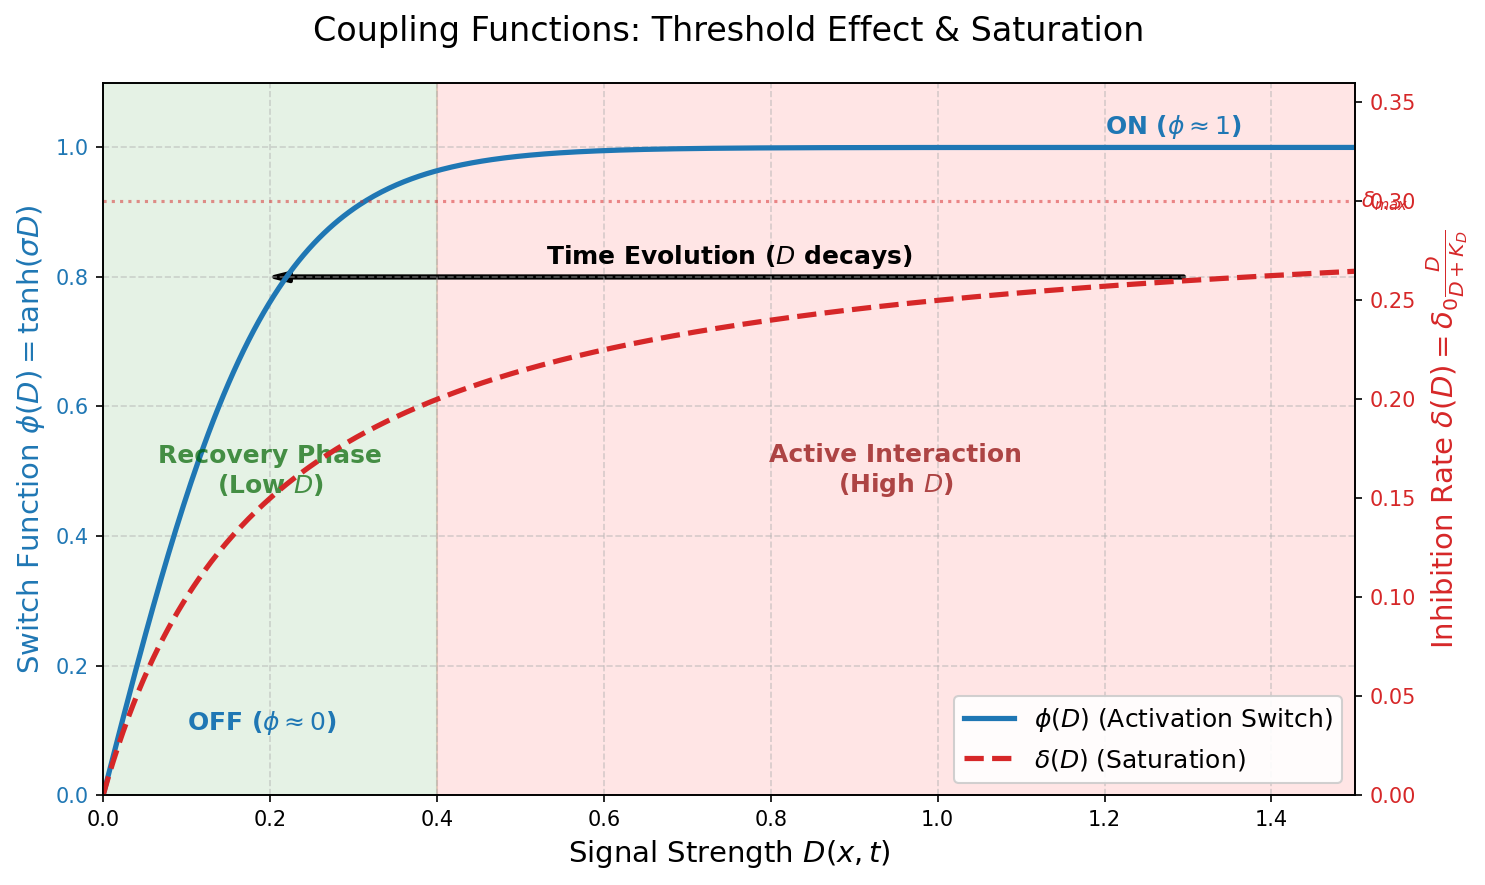

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# ---------------------------------------------------------
# 1. 参数设置与函数定义
# ---------------------------------------------------------
# 定义 D 的范围 (模拟从 0 到 D_max)
D_max = 1.5
D = np.linspace(0, D_max, 500)

# 参数 (参考之前的论文上下文)
sigma = 5.0          # 控制 phi 的陡峭程度 (开关灵敏度)
delta_0 = 0.3        # delta 的最大饱和值
K_D = 0.2            # delta 的半饱和常数

# 函数定义
# 1. 开关/调节函数 (Sigmoid / Tanh)
phi = np.tanh(sigma * D)

# 2. 抑制/饱和函数 (Michaelis-Menten)
delta = delta_0 * (D / (D + K_D))

# ---------------------------------------------------------
# 2. 绘图初始化
# ---------------------------------------------------------
fig, ax1 = plt.subplots(figsize=(10, 6), dpi=150)

# 设置网格
ax1.grid(True, which='major', linestyle='--', alpha=0.5)
ax1.set_xlabel(r'Signal Strength $D(x,t)$', fontsize=14)
ax1.set_xlim(0, D_max)

# ---------------------------------------------------------
# 3. 绘制左轴 (Phi - 开关行为)
# ---------------------------------------------------------
color_phi = '#1f77b4' # 蓝色
ax1.set_ylabel(r'Switch Function $\phi(D) = \tanh(\sigma D)$', color=color_phi, fontsize=14)
line1, = ax1.plot(D, phi, color=color_phi, linewidth=2.5, label=r'$\phi(D)$ (Activation Switch)')
ax1.tick_params(axis='y', labelcolor=color_phi)
ax1.set_ylim(0, 1.1) # 留一点空间给标注

# 标注 "ON" 和 "OFF" 状态
ax1.text(0.1, 0.1, r'OFF ($\phi \approx 0$)', color=color_phi, fontsize=12, fontweight='bold')
ax1.text(1.2, 1.02, r'ON ($\phi \approx 1$)', color=color_phi, fontsize=12, fontweight='bold')

# ---------------------------------------------------------
# 4. 绘制右轴 (Delta - 饱和抑制)
# ---------------------------------------------------------
ax2 = ax1.twinx()  # 创建共享 x 轴的第二个 y 轴

color_delta = '#d62728' # 红色
ax2.set_ylabel(r'Inhibition Rate $\delta(D) = \delta_0 \frac{D}{D+K_D}$', color=color_delta, fontsize=14)
line2, = ax2.plot(D, delta, color=color_delta, linewidth=2.5, linestyle='--', label=r'$\delta(D)$ (Saturation)')
ax2.tick_params(axis='y', labelcolor=color_delta)
ax2.set_ylim(0, delta_0 * 1.2)

# 标注饱和值
ax2.axhline(delta_0, color=color_delta, linestyle=':', alpha=0.5)
ax2.text(D_max, delta_0, r' $\delta_{max}$', va='center', color=color_delta)

# ---------------------------------------------------------
# 5. 高亮区域与时间流向 (关键部分)
# ---------------------------------------------------------

# 阈值区域 (Transition Zone)
# 当 sigma=5, tanh(1) approx 0.76 at D=0.2.
# 我们可以认为 D < 0.2 是快速变化区
threshold_x = 0.4

# 区域 A: 低信号区 (Low D) -> 系统恢复
ax1.axvspan(0, threshold_x, color='green', alpha=0.1)
ax1.text(threshold_x/2, 0.5, "Recovery Phase\n(Low $D$)",
         ha='center', va='center', color='darkgreen', fontsize=12, fontweight='bold', alpha=0.7)

# 区域 B: 高信号区 (High D) -> 强相互作用
ax1.axvspan(threshold_x, D_max, color='red', alpha=0.1)
ax1.text((threshold_x + D_max)/2, 0.5, "Active Interaction\n(High $D$)",
         ha='center', va='center', color='darkred', fontsize=12, fontweight='bold', alpha=0.7)

# 添加时间流向箭头 (Time Arrow)
# 因为 D 随时间衰减 (exp(-gamma t))，所以时间轴其实是从右向左的
style = "Simple, tail_width=0.5, head_width=4, head_length=8"
arrow = patches.FancyArrowPatch((1.3, 0.8), (0.2, 0.8),
                                connectionstyle="arc3,rad=0", color="black", arrowstyle=style, lw=2)
ax1.add_patch(arrow)
ax1.text(0.75, 0.82, r'Time Evolution ($D$ decays)', ha='center', fontsize=12, fontweight='bold')

# ---------------------------------------------------------
# 6. 图例与美化
# ---------------------------------------------------------
# 合并两个轴的图例
lines = [line1, line2]
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='lower right', fontsize=12, frameon=True, facecolor='white', framealpha=0.9)

plt.title(r'Coupling Functions: Threshold Effect & Saturation', fontsize=16, pad=20)
plt.tight_layout()

# 保存或显示
# plt.savefig('coupling_functions.png', dpi=300)
plt.show()

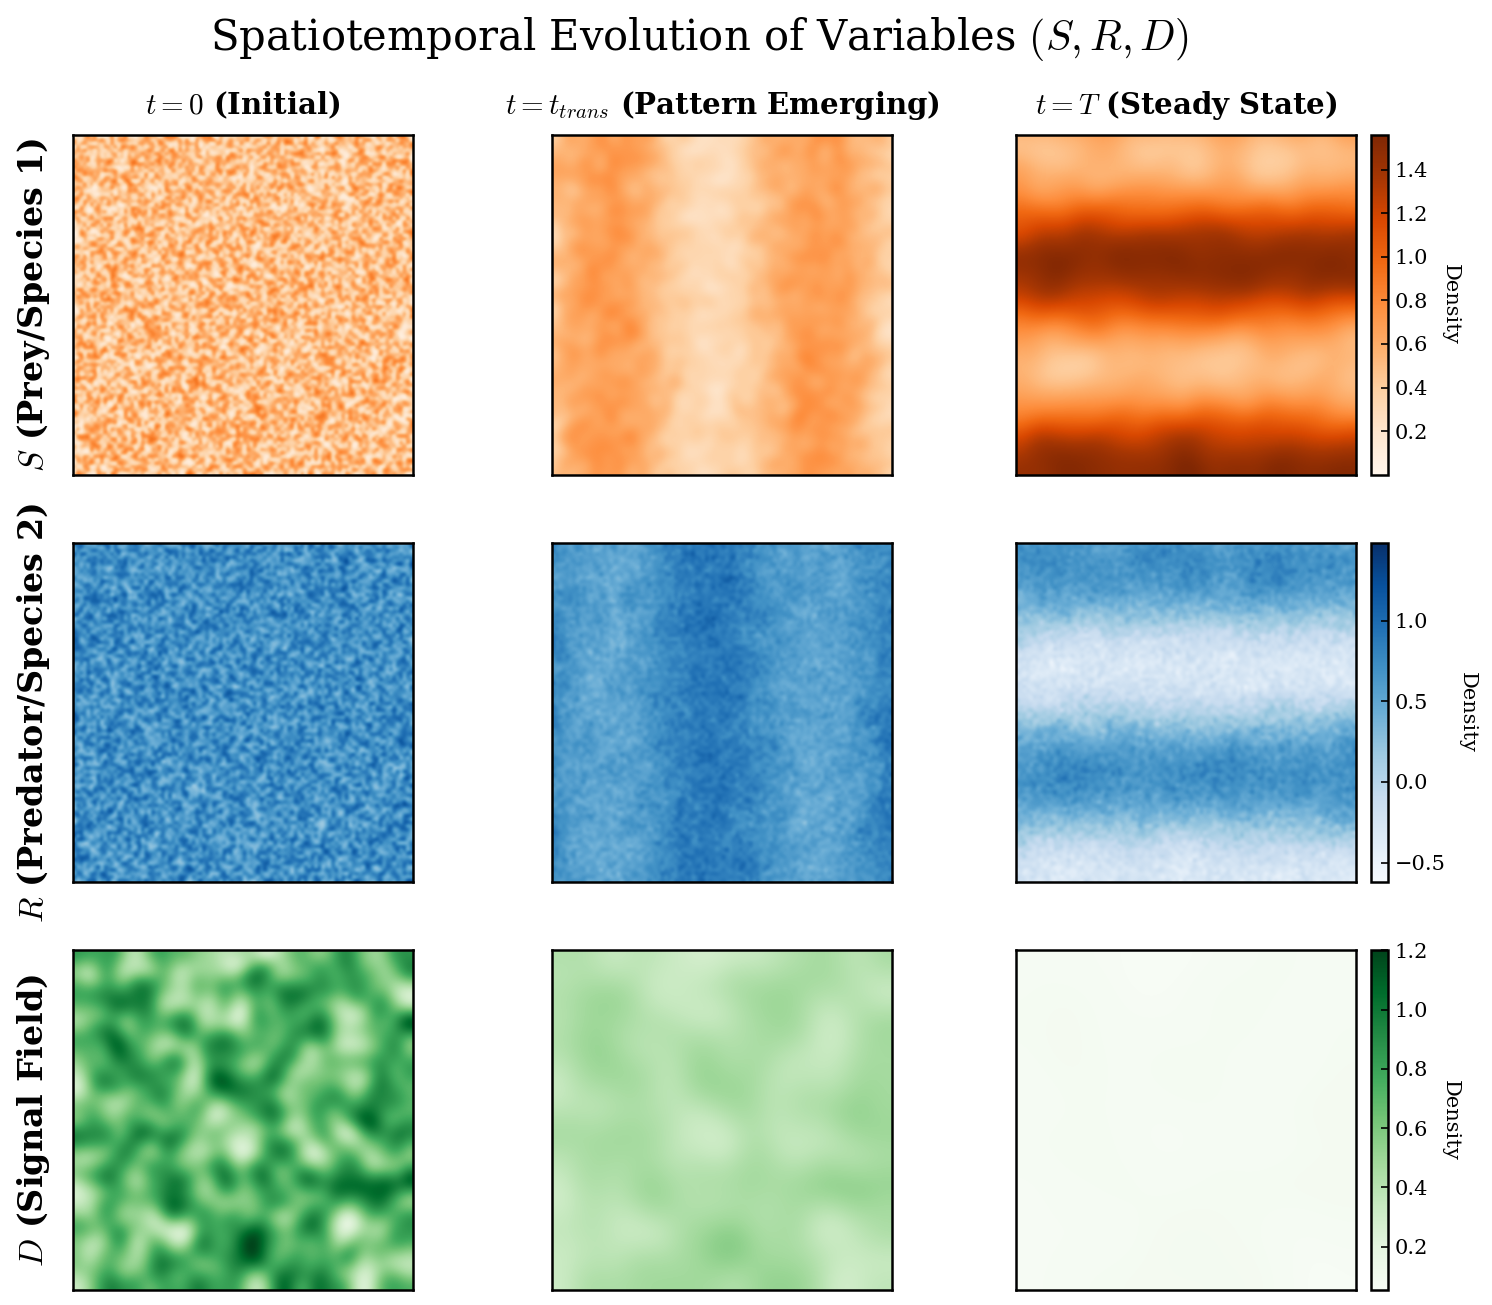

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy.ndimage import gaussian_filter

# ==========================================
# 1. 生成虚拟数据 (Dummy Data Generation)
# ==========================================
# 说明：这里仅为了演示绘图效果。实际使用时，请替换为您的模拟数据。
# 数据结构需求：List of 2D numpy arrays [Array_t0, Array_t1, Array_t2]

def generate_pattern_S(seed, time_step):
    np.random.seed(seed)
    noise = np.random.rand(100, 100)
    # 模拟 S 从无序到有序斑图的过程
    if time_step == 0:
        return noise # 初始噪声
    elif time_step == 1:
        # 过渡态：稍微平滑，开始出现波纹
        return gaussian_filter(noise, sigma=2) + np.sin(np.linspace(0, 10, 100)) * 0.2
    else:
        # 稳态：高度结构化的条纹斑图
        return gaussian_filter(noise, sigma=4) * 2 + np.cos(np.linspace(0, 10, 100))[:,None] * 0.5

# --- Row 1 & 2: S and R ---
# S: Prey pattern
S_data = [generate_pattern_S(42, t) for t in range(3)]
# R: Predator pattern (complementary to S)
R_data = [1.2 - d + np.random.normal(0, 0.1, (100,100)) for d in S_data]

# --- Row 3: D (修正部分：平滑场 + 扩散 + 衰减) ---
# 物理改进：D 不再是噪点，而是平滑的浓度场。
np.random.seed(101)
raw_noise = np.random.rand(100, 100)

# t=0: 初始平滑云团 (模拟初始投放或分泌)
# 使用 sigma=3 将随机噪点抹平为连续的场
D_t0 = gaussian_filter(raw_noise, sigma=3)
# 归一化并提升基底，确保全域有值
D_t0 = (D_t0 - D_t0.min()) / (D_t0.max() - D_t0.min()) + 0.2

# t=trans: 扩散 (变得更模糊) + 衰减 (数值整体变小)
# sigma 增大 (3->5) 模拟扩散项 d_D * Delta D
# 乘以 0.6 模拟衰减项 -gamma * D
D_t1 = gaussian_filter(D_t0, sigma=5) * 0.6

# t=T: 几乎完全消散
# sigma 继续增大 (5->8)，数值大幅衰减 (* 0.1)
D_T  = gaussian_filter(D_t0, sigma=8) * 0.1

D_data = [D_t0, D_t1, D_T]

# ==========================================
# 2. 绘图配置
# ==========================================

# 将数据整合到列表: (LaTeX 标题, Colormap, 数据列表)
all_variables = [
    ('$S$ (Prey/Species 1)', 'Oranges', S_data),
    ('$R$ (Predator/Species 2)', 'Blues', R_data),
    ('$D$ (Signal Field)', 'Greens', D_data)
]

time_labels = ['$t=0$ (Initial)', '$t=t_{trans}$ (Pattern Emerging)', '$t=T$ (Steady State)']

# ==========================================
# 3. 绘图主循环
# ==========================================

fig, axes = plt.subplots(3, 3, figsize=(12, 10), dpi=150)
plt.subplots_adjust(wspace=0.1, hspace=0.2) # 调整子图间距

for row_idx, (var_name, cmap, snapshots) in enumerate(all_variables):

    # --- 关键步骤：统一该行的量程 ---
    # 必须基于该变量在所有时间点的数据计算 min/max
    # 这样 D 在 t=T 时颜色变浅，才能体现出"衰减"
    vmin = min(d.min() for d in snapshots)
    vmax = max(d.max() for d in snapshots)

    for col_idx, data in enumerate(snapshots):
        ax = axes[row_idx, col_idx]

        # 绘制热力图
        im = ax.imshow(data, cmap=cmap, vmin=vmin, vmax=vmax, origin='lower', interpolation='bicubic')

        # 美化：去除坐标轴刻度，保留边框
        ax.set_xticks([])
        ax.set_yticks([])

        # 设置列标题 (仅在第一行)
        if row_idx == 0:
            ax.set_title(time_labels[col_idx], fontsize=14, pad=10, fontweight='bold')

        # 设置行标签 (仅在第一列)
        if col_idx == 0:
            ax.set_ylabel(var_name, fontsize=16, fontweight='bold', rotation=90, labelpad=10)

    # --- 添加颜色条 (Colorbar) ---
    # 放在该行最后一个子图的右侧
    last_ax = axes[row_idx, -1]
    divider = make_axes_locatable(last_ax)
    cax = divider.append_axes("right", size="5%", pad=0.1)

    cbar = fig.colorbar(im, cax=cax)
    cbar.ax.tick_params(labelsize=10)
    # 颜色条标签
    cbar.set_label(f'Density', rotation=270, labelpad=15, fontsize=10)

# 总标题
fig.suptitle('Spatiotemporal Evolution of Variables $(S, R, D)$', fontsize=20, y=0.96)

# 保存与显示
# plt.savefig('simulation_snapshots_corrected.png', bbox_inches='tight')
plt.show()

/tmp/ipython-input-249441352.py:129: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


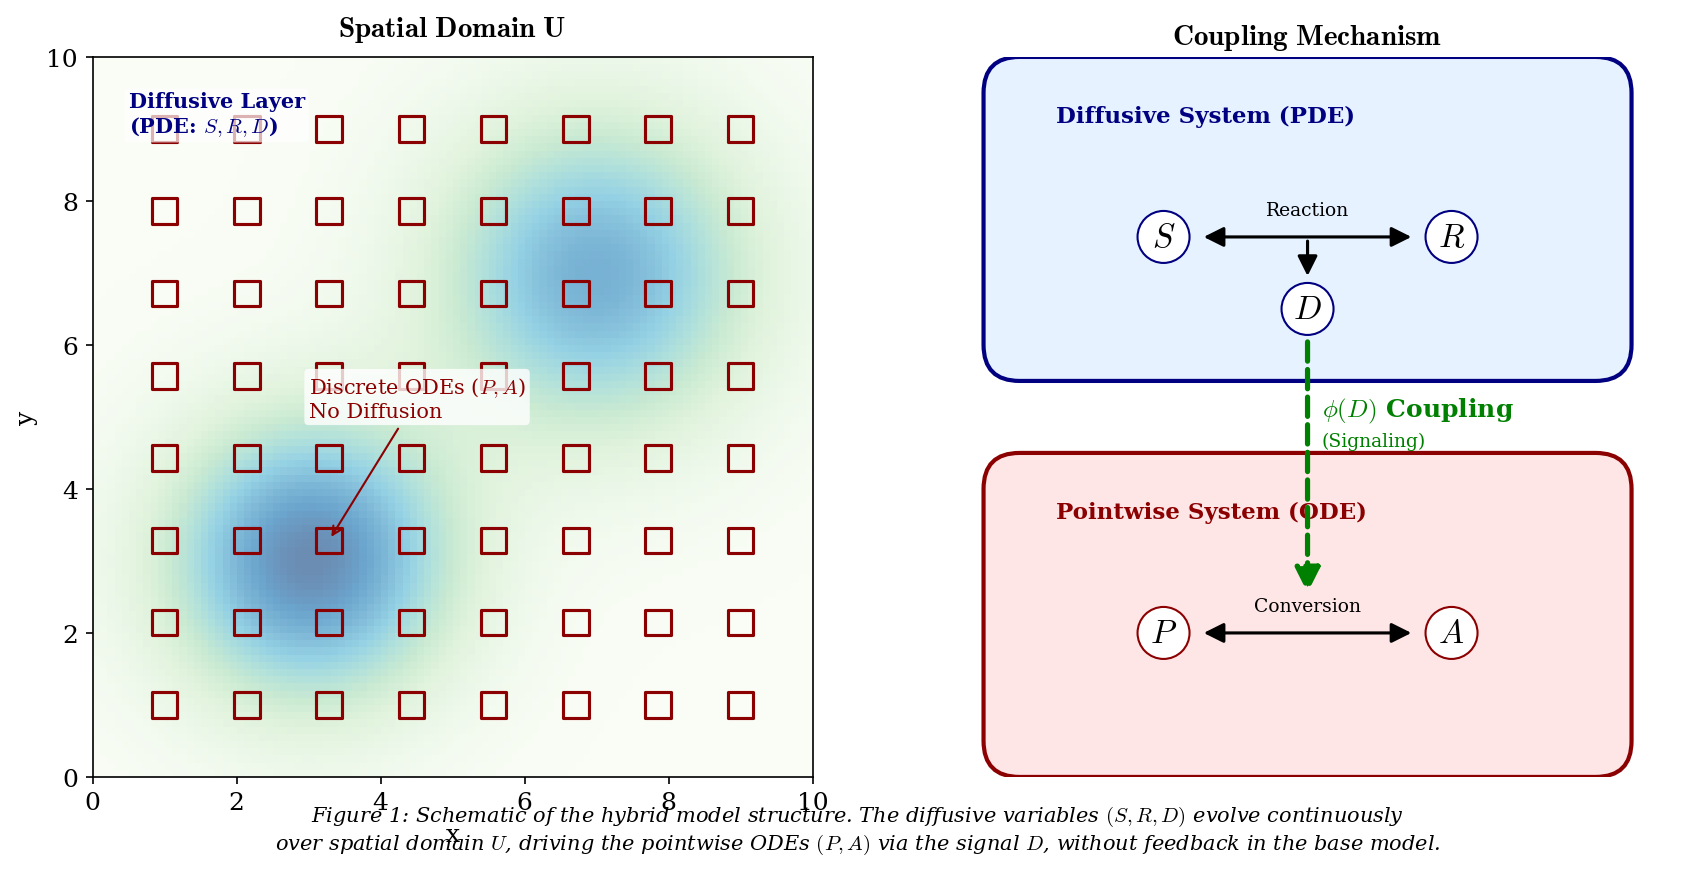

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

# 设置风格：使用类似 LaTeX 的字体
plt.rcParams.update({
    "text.usetex": False, # 如果你有本地 LaTeX 环境可设为 True，否则用 mathtext
    "font.family": "serif",
    "font.serif": ["DejaVu Serif"],
    "mathtext.fontset": "cm", # Computer Modern (LaTeX 风格)
    "font.size": 12
})

def draw_schematic():
    # 创建画布：宽一些，以便放下左侧的区域图和右侧的机制图
    fig = plt.figure(figsize=(12, 6), dpi=150)

    # ==========================================
    # 1. 左侧：空间区域示意图 (Macro Domain)
    # ==========================================
    ax_map = fig.add_axes([0.05, 0.1, 0.45, 0.8]) # [left, bottom, width, height]

    # A. Diffusive Layer (PDE) - 背景渐变
    # 创建一个模拟的扩散场 (Gaussian blobs)
    x = np.linspace(0, 10, 100)
    y = np.linspace(0, 10, 100)
    X, Y = np.meshgrid(x, y)
    Z = np.exp(-((X-3)**2 + (Y-3)**2)/4) + 0.8 * np.exp(-((X-7)**2 + (Y-7)**2)/5)

    # 绘制热图代表浓度 S, R, D
    im = ax_map.imshow(Z, extent=[0, 10, 0, 10], origin='lower', cmap='GnBu', alpha=0.6)
    ax_map.set_title(r"$\bf{Spatial\ Domain\ } U$", fontsize=14, pad=10)
    ax_map.set_xlabel("x")
    ax_map.set_ylabel("y")

    # 添加标签说明
    ax_map.text(0.5, 9.2, "Diffusive Layer\n(PDE: $S, R, D$)", color='navy',
                ha='left', va='center', fontweight='bold', fontsize=10,
                bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.2'))

    # B. Non-diffusive Layer (ODE) - 离散网格/点
    # 在区域内生成离散点
    grid_x = np.linspace(1, 9, 8)
    grid_y = np.linspace(1, 9, 8)
    GX, GY = np.meshgrid(grid_x, grid_y)

    # 绘制代表 (P, A) 的离散单元
    # 使用散点图，空心方块代表细胞/定点
    ax_map.scatter(GX, GY, s=150, marker='s', facecolors='none', edgecolors='darkred', linewidth=1.5, label='ODE Points')

    # 标注其中一个点
    ax_map.annotate(r"Discrete ODEs ($P, A$)" + "\nNo Diffusion",
                    xy=(GX[2,2], GY[2,2]), xytext=(3, 5),
                    arrowprops=dict(arrowstyle="->", color='darkred'),
                    color='darkred', fontsize=10,
                    bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', boxstyle='round,pad=0.2'))

    # 美化坐标轴
    ax_map.set_xlim(0, 10)
    ax_map.set_ylim(0, 10)

    # ==========================================
    # 2. 右侧：相互作用机制 (Interaction Topology)
    # ==========================================
    ax_mech = fig.add_axes([0.55, 0.1, 0.40, 0.8])
    ax_mech.set_axis_off() # 隐藏坐标轴
    ax_mech.set_title(r"$\bf{Coupling\ Mechanism}$", fontsize=14)

    # 绘制层级框
    # PDE Box
    pde_box = patches.FancyBboxPatch((0.1, 0.6), 0.8, 0.35, boxstyle="round,pad=0.05",
                                     linewidth=2, edgecolor='navy', facecolor='#e6f2ff')
    ax_mech.add_patch(pde_box)
    ax_mech.text(0.15, 0.91, "Diffusive System (PDE)", color='navy', fontsize=11, fontweight='bold')

    # ODE Box
    ode_box = patches.FancyBboxPatch((0.1, 0.05), 0.8, 0.35, boxstyle="round,pad=0.05",
                                     linewidth=2, edgecolor='darkred', facecolor='#ffe6e6')
    ax_mech.add_patch(ode_box)
    ax_mech.text(0.15, 0.36, "Pointwise System (ODE)", color='darkred', fontsize=11, fontweight='bold')

    # --- 绘制节点 (Nodes) ---
    props_circle = dict(boxstyle="circle,pad=0.3", fc="white", ec="black", lw=1.5)

    # S and R
    ax_mech.text(0.3, 0.75, r"$S$", ha="center", va="center", size=16, bbox=dict(boxstyle="circle,pad=0.3", fc="white", ec="navy"))
    ax_mech.text(0.7, 0.75, r"$R$", ha="center", va="center", size=16, bbox=dict(boxstyle="circle,pad=0.3", fc="white", ec="navy"))

    # D (Signaling Molecule)
    ax_mech.text(0.5, 0.65, r"$D$", ha="center", va="center", size=16, bbox=dict(boxstyle="circle,pad=0.3", fc="white", ec="navy"))

    # P and A
    ax_mech.text(0.3, 0.20, r"$P$", ha="center", va="center", size=16, bbox=dict(boxstyle="circle,pad=0.3", fc="white", ec="darkred"))
    ax_mech.text(0.7, 0.20, r"$A$", ha="center", va="center", size=16, bbox=dict(boxstyle="circle,pad=0.3", fc="white", ec="darkred"))

    # --- 绘制箭头 (Arrows) ---
    arrow_props = dict(arrowstyle="-|>", mutation_scale=20, lw=1.5, color='black')
    arrow_bidir = dict(arrowstyle="<|-|>", mutation_scale=20, lw=1.5, color='black')

    # S <-> R interaction
    ax_mech.annotate("", xy=(0.35, 0.75), xytext=(0.65, 0.75), arrowprops=arrow_bidir)
    ax_mech.text(0.5, 0.78, "Reaction", ha="center", fontsize=9)

    # Production of D (from S/R logic)
    # 简化的画法：从 S/R 连线中间指向 D
    ax_mech.annotate("", xy=(0.5, 0.69), xytext=(0.5, 0.75), arrowprops=arrow_props)

    # P <-> A interaction
    ax_mech.annotate("", xy=(0.35, 0.20), xytext=(0.65, 0.20), arrowprops=arrow_bidir)
    ax_mech.text(0.5, 0.23, "Conversion", ha="center", fontsize=9)

    # --- 关键的耦合箭头 (Coupling Arrow) ---
    # D drives P/A (Downward arrow crossing the boxes)
    # 起点: D node bottom (0.5, 0.61) -> 终点: P/A center (0.5, 0.25)

    # 画一个明显的跨层箭头
    ax_mech.annotate("", xy=(0.5, 0.25), xytext=(0.5, 0.61),
                     arrowprops=dict(arrowstyle="-|>", mutation_scale=25, lw=2.5, color='green', linestyle='--'))

    # 箭头标签
    ax_mech.text(0.52, 0.5, r"$\phi(D)$ Coupling", color='green', fontweight='bold', ha='left')
    ax_mech.text(0.52, 0.46, "(Signaling)", color='green', fontsize=9, ha='left')

    # 添加说明文字
    fig.text(0.5, 0.02, "Figure 1: Schematic of the hybrid model structure. The diffusive variables $(S,R,D)$ evolve continuously\n"
                        "over spatial domain $U$, driving the pointwise ODEs $(P,A)$ via the signal $D$, without feedback in the base model.",
             ha='center', fontsize=10, style='italic')

    plt.tight_layout()
    plt.show()

# 运行绘图
if __name__ == "__main__":
    draw_schematic()

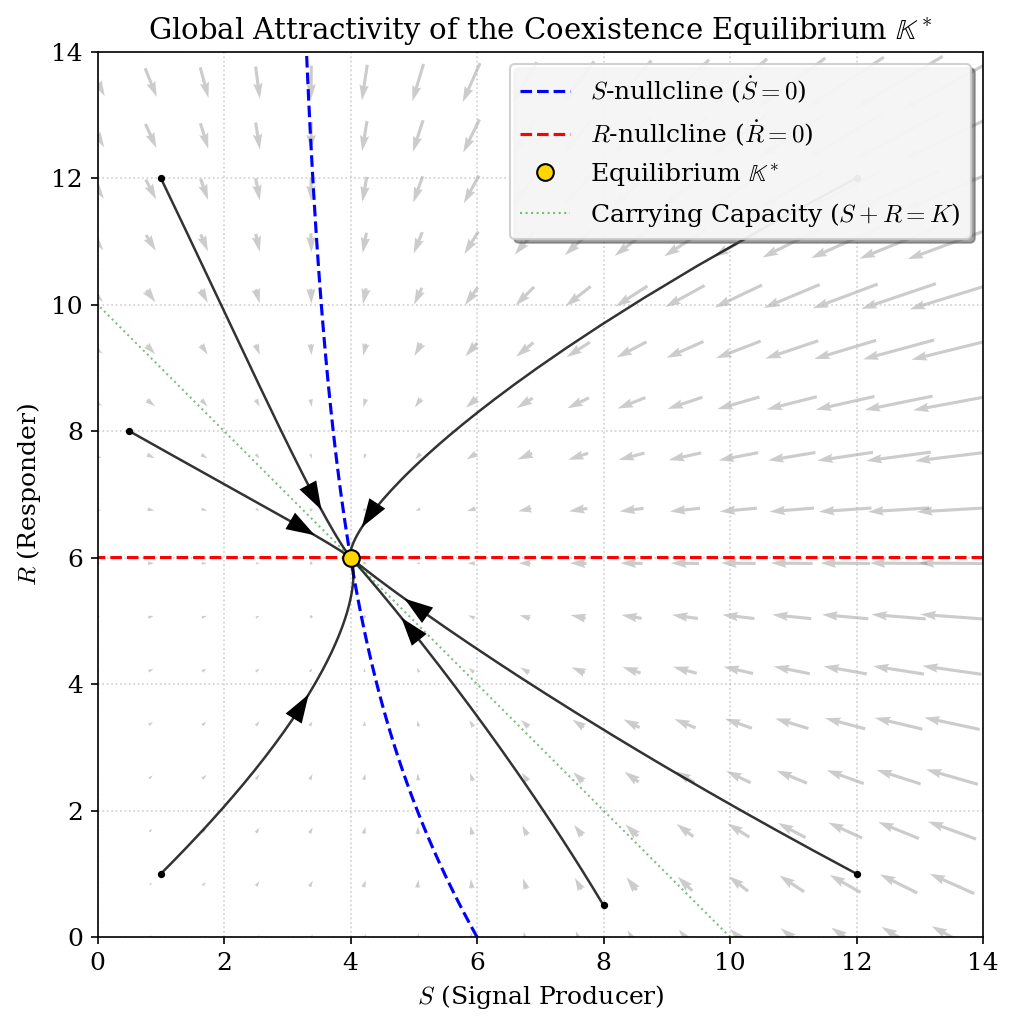

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# --- 1. 参数设置 (Model Parameters) ---
# 选择一组能够清晰展示动力学的参数
# 确保 alpha, xi > 0 且 K > 0
K = 10.0          # carrying capacity
alpha = 0.6       # transfer rate S -> R
xi = 0.4          # transfer rate R -> S
lambda_S = 1.5    # growth rate of S
lambda_R = 1.0    # growth rate of R

# 计算理论平衡点 (Theorem 3.3)
S_star = (xi * K) / (alpha + xi)
R_star = (alpha * K) / (alpha + xi)
K_star = (S_star, R_star)

# --- 2. 定义 ODE 系统 ---
def reaction_diffusion_ode(state, t):
    S, R = state
    # 逻辑斯蒂项 (S+R 对 K 的竞争)
    logistic = 1 - (S + R) / K

    # 动力学方程
    dS = lambda_S * S * logistic - alpha * S + xi * R
    dR = lambda_R * R * logistic + alpha * S - xi * R
    return [dS, dR]

# 定义用于绘制向量场和 Nullclines 的网格函数
def get_derivatives(S_grid, R_grid):
    logistic = 1 - (S_grid + R_grid) / K
    dS = lambda_S * S_grid * logistic - alpha * S_grid + xi * R_grid
    dR = lambda_R * R_grid * logistic + alpha * S_grid - xi * R_grid
    return dS, dR

# --- 3. 绘图设置 ---
plt.figure(figsize=(8, 7), dpi=150)

# 定义绘图范围
max_val = K * 1.4
S_range = np.linspace(0, max_val, 200)
R_range = np.linspace(0, max_val, 200)
SS, RR = np.meshgrid(S_range, R_range)

# 计算网格上的导数
DS, DR = get_derivatives(SS, RR)

# --- 4. 绘制 Nullclines (零增长线) ---
# 使用 contour 绘制 dS=0 和 dR=0 的等高线，比解析解更稳健
# S-nullcline (蓝色虚线)
plt.contour(SS, RR, DS, levels=[0], colors='blue', linestyles='--', linewidths=1.5)
# R-nullcline (红色虚线)
plt.contour(SS, RR, DR, levels=[0], colors='red', linestyles='--', linewidths=1.5)

# 添加 Nullcline 标签 (手动添加图例更清晰)
plt.plot([], [], 'b--', label=r'$S$-nullcline ($\dot{S}=0$)')
plt.plot([], [], 'r--', label=r'$R$-nullcline ($\dot{R}=0$)')

# --- 5. 绘制向量场 (Vector Field) ---
# 降低密度以保持清晰
step = 12
plt.quiver(SS[::step, ::step], RR[::step, ::step],
           DS[::step, ::step], DR[::step, ::step],
           color='gray', alpha=0.4, pivot='mid', scale=None)

# --- 6. 绘制轨迹 (Trajectories) ---
# 定义不同的初始条件，覆盖第一象限的不同区域
initial_conditions = [
    [1, 1],         # 低密度
    [0.5, 8],       # R 占优
    [8, 0.5],       # S 占优
    [12, 12],       # 过饱和 (超过 K)
    [1, 12],        # 极端偏离
    [12, 1]         # 极端偏离
]

t = np.linspace(0, 30, 500)

for i, y0 in enumerate(initial_conditions):
    sol = odeint(reaction_diffusion_ode, y0, t)
    # 画线
    plt.plot(sol[:, 0], sol[:, 1], 'k-', linewidth=1.2, alpha=0.8)
    # 画箭头指示方向 (在轨迹中间位置)
    mid_idx = 30
    plt.arrow(sol[mid_idx, 0], sol[mid_idx, 1],
              sol[mid_idx+1, 0]-sol[mid_idx, 0], sol[mid_idx+1, 1]-sol[mid_idx, 1],
              shape='full', lw=0, length_includes_head=True, head_width=0.3, color='k')
    # 标记起始点
    plt.plot(y0[0], y0[1], 'k.', markersize=5)

# --- 7. 绘制平衡点 ---
plt.plot(S_star, R_star, 'ko', markersize=8, markerfacecolor='gold', zorder=10,
         label=r'Equilibrium $\mathbb{K}^*$')

# 标记 Carrying Capacity 线 (S+R=K) 辅助理解
# 在平衡点，S+R 必须等于 K (如果 alpha/xi 平衡) 或者由 dynamics 决定
# 在本模型中，稳态必定满足 S+R=K (Summing dS/dt and dR/dt shows S+R approaches K)
plt.plot([K, 0], [0, K], 'g:', linewidth=1, alpha=0.5, label=r'Carrying Capacity ($S+R=K$)')

# --- 8. 图像美化 ---
plt.title(r'Global Attractivity of the Coexistence Equilibrium $\mathbb{K}^*$', fontsize=14)
plt.xlabel(r'$S$ (Signal Producer)', fontsize=12)
plt.ylabel(r'$R$ (Responder)', fontsize=12)
plt.xlim(0, max_val)
plt.ylim(0, max_val)
plt.grid(True, linestyle=':', alpha=0.6)
plt.legend(loc='upper right', framealpha=0.9, shadow=True)

# 强制坐标轴比例一致，避免相图扭曲
plt.gca().set_aspect('equal', adjustable='box')

plt.tight_layout()
plt.show()

<>:98: SyntaxWarning: invalid escape sequence '\m'
<>:98: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipython-input-1048494908.py:98: SyntaxWarning: invalid escape sequence '\m'
  ax.fill_between(k_vals, 0, 2, color='#ffe6e6', alpha=0.5, label='Unstable Region ($\mathrm{Re}(\lambda)>0$)')


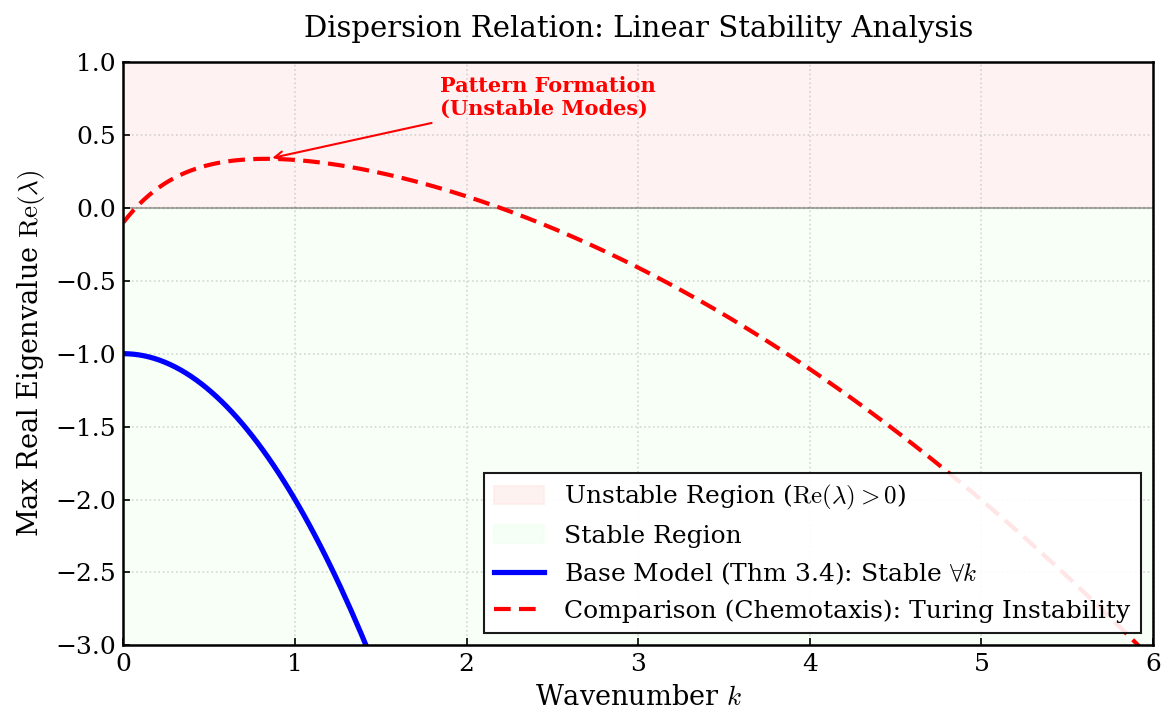

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- 1. 设置绘图风格 ---
plt.rcParams.update({
    "font.family": "serif",
    "font.size": 12,
    "axes.linewidth": 1.2,
    "xtick.direction": "in",
    "ytick.direction": "in"
})

def calculate_dispersion_relation():
    # --- 2. 模型参数 (Base Model) ---
    # 使用与 Figure 2 一致的参数
    K = 10.0
    alpha = 0.6
    xi = 0.4
    lambda_S = 1.5
    lambda_R = 1.0

    # 基础模型的扩散系数 (任意 d_S, d_R > 0 都应稳定)
    d_S_base = 1.0
    d_R_base = 1.0

    # 计算稳态 S*, R*
    S_star = (xi * K) / (alpha + xi)
    R_star = (alpha * K) / (alpha + xi)

    # --- 3. 计算雅可比矩阵 (Jacobian at Equilibrium) ---
    # J = [[a, b], [c, d]]
    # 注意：在稳态处 S+R=K，因此 logistic 项 (1-(S+R)/K) 为 0，但其导数不为 0
    # J11 = d(dS/dt)/dS = lambda_S(1-(S+R)/K) + S*(-lambda_S/K) - alpha -> -lambda_S*S/K - alpha

    j11 = -lambda_S * S_star / K - alpha
    j12 = -lambda_S * S_star / K + xi
    j21 = -lambda_R * R_star / K + alpha
    j22 = -lambda_R * R_star / K - xi

    # Base Model 的雅可比矩阵
    J_base = np.array([[j11, j12],
                       [j21, j22]])

    # --- 4. 生成波数范围 ---
    k_vals = np.linspace(0, 6, 200) # 波数 k

    # --- 5. 定义计算最大特征值的函数 ---
    def get_max_eigenvalue(k_array, d_S, d_R, J):
        re_lambdas = []
        for k in k_array:
            k2 = k**2
            # 特征方程: det(lambda*I - (J - k^2*D)) = 0
            # 形式: lambda^2 + A*lambda + B = 0

            # Trace of (J - k^2*D)
            tr = np.trace(J) - k2*(d_S + d_R)

            # Det of (J - k^2*D)
            # M = [[J11-d_S*k2, J12], [J21, J22-d_R*k2]]
            det = (J[0,0] - d_S*k2) * (J[1,1] - d_R*k2) - J[0,1] * J[1,0]

            # 求解二次方程
            delta = tr**2 - 4*det

            if delta >= 0:
                l1 = (tr + np.sqrt(delta)) / 2
                l2 = (tr - np.sqrt(delta)) / 2
                re_lambdas.append(max(l1, l2))
            else:
                # 复根，实部为 tr/2
                re_lambdas.append(tr / 2)
        return np.array(re_lambdas)

    # 计算 Base Model 曲线 (Solid Line)
    lambda_base = get_max_eigenvalue(k_vals, d_S_base, d_R_base, J_base)

    # --- 6. 构建“不稳定性”对比案例 (Comparison Case) ---
    # 为了展示图灵斑图，我们需要制造 instability：
    # 条件1: 抑制剂扩散快 (d_R >> d_S)
    # 条件2: 激活剂自催化 (J11 > 0)
    # 我们这里手动修改参数来模拟 Section 4 可能出现的 Chemotaxis 导致的不稳
    d_S_unstable = 0.1
    d_R_unstable = 4.0

    # 修改雅可比矩阵以模拟 Activator-Inhibitor (仅用于对比展示)
    J_unstable = np.array([[0.5, -0.6],
                           [0.6, -0.7]])

    lambda_chemotaxis = get_max_eigenvalue(k_vals, d_S_unstable, d_R_unstable, J_unstable)

    # --- 7. 绘图 ---
    fig, ax = plt.subplots(figsize=(8, 5), dpi=150)

    # 绘制零线 (Critical Threshold)
    ax.axhline(0, color='black', linewidth=1, linestyle='-', alpha=0.3)

    # 区域填充 (Unstable Region)
    ax.fill_between(k_vals, 0, 2, color='#ffe6e6', alpha=0.5, label='Unstable Region ($\mathrm{Re}(\lambda)>0$)')
    ax.fill_between(k_vals, -5, 0, color='#e6ffe6', alpha=0.3, label='Stable Region')

    # 绘制曲线
    # 1. Base Model
    ax.plot(k_vals, lambda_base, 'b-', linewidth=2.5,
            label=r'Base Model (Thm 3.4): Stable $\forall k$')

    # 2. Chemotaxis Comparison
    ax.plot(k_vals, lambda_chemotaxis, 'r--', linewidth=2, dashes=(4, 2),
            label=r'Comparison (Chemotaxis): Turing Instability')

    # 标注
    ax.set_xlabel(r'Wavenumber $k$', fontsize=13)
    ax.set_ylabel(r'Max Real Eigenvalue $\mathrm{Re}(\lambda)$', fontsize=13)
    ax.set_title(r'Dispersion Relation: Linear Stability Analysis', fontsize=14, pad=12)

    # 范围限制
    ax.set_ylim(-3, 1.0)
    ax.set_xlim(0, 6)

    # 图例
    ax.legend(loc='lower right', frameon=True, fancybox=False, edgecolor='k', framealpha=0.9)

    # 关键点标注 (Arrow)
    # 找出不稳定曲线的最大值
    max_idx = np.argmax(lambda_chemotaxis)
    max_k = k_vals[max_idx]
    max_val = lambda_chemotaxis[max_idx]

    if max_val > 0:
        ax.annotate('Pattern Formation\n(Unstable Modes)',
                    xy=(max_k, max_val), xytext=(max_k+1, max_val+0.3),
                    arrowprops=dict(arrowstyle='->', color='red'),
                    color='red', fontsize=10, fontweight='bold')

    plt.tight_layout()
    plt.grid(True, linestyle=':', alpha=0.5)
    plt.show()

if __name__ == "__main__":
    calculate_dispersion_relation()

Running simulation (this may take a few seconds)...
Done.


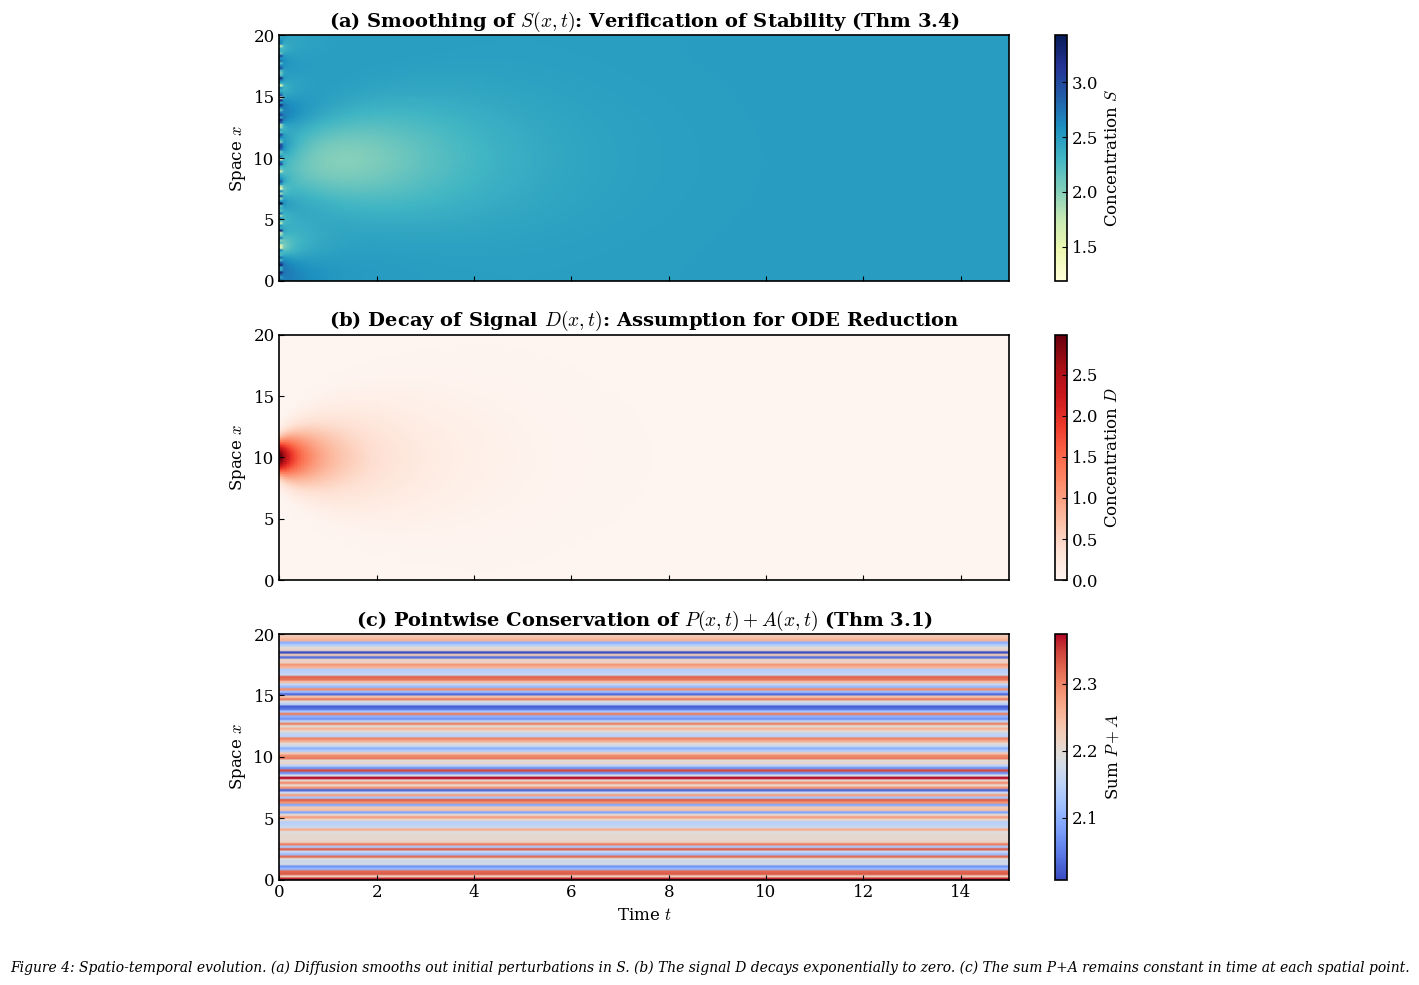

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# --- 1. 设置绘图参数 ---
plt.rcParams.update({
    "font.family": "serif",
    "font.size": 12,
    "axes.titlesize": 14,
    "axes.labelsize": 12
})

# --- 2. 模型参数 ---
L = 20.0          # 空间长度
N = 100           # 空间网格点数
dx = L / N
x = np.linspace(0, L, N)

# 时间跨度
T_end = 15.0
t_eval = np.linspace(0, T_end, 200)

# 物理参数
d_S = 1.0         # S 的扩散系数
d_R = 1.0         # R 的扩散系数
d_D = 2.0         # D 的扩散系数 (通常信号分子扩散较快)
mu_D = 0.5        # D 的自然衰减率 (导致 D -> 0)

# 反应速率
K = 5.0           # 承载量
alpha = 0.5       # S -> R
xi = 0.5          # R -> S
beta = 1.0        # P/A 转化率
theta = 1.0       # P/A 转化率

# 信号函数 phi(D) = D / (1+D)
def phi(D_val):
    return D_val / (1.0 + D_val + 1e-6) # 1e-6 防止分母为0

# --- 3. 定义 PDE 系统 (离散化) ---
def pde_system(t, y):
    # y 是一个展平的一维数组，包含 [S, R, D, P, A]
    # 拆分数组
    S = y[0:N]
    R = y[N:2*N]
    D = y[2*N:3*N]
    P = y[3*N:4*N]
    A = y[4*N:5*N]

    # 1. 计算拉普拉斯算子 (离散二阶导数)
    # 使用 Neumann 边界条件 (零通量: u[-1]=u[1])
    def laplacian(u):
        d2u = np.zeros_like(u)
        d2u[1:-1] = (u[2:] - 2*u[1:-1] + u[:-2]) / dx**2
        d2u[0]    = 2*(u[1] - u[0]) / dx**2  # Left BC
        d2u[-1]   = 2*(u[-2] - u[-1]) / dx**2 # Right BC
        return d2u

    Delta_S = laplacian(S)
    Delta_R = laplacian(R)
    Delta_D = laplacian(D)

    # 2. 计算反应项
    # Phi(D) 耦合
    phi_D = phi(D)

    # Logistic term
    logistic = 1.0 - (S + R) / K

    # Dynamics for S, R (Base model structure)
    # 假设 D 影响 R->S 的转化率 (或类似机制)
    dS_dt = d_S * Delta_S + S * logistic - alpha * S + xi * (1 - phi_D) * R
    dR_dt = d_R * Delta_R + R * logistic + alpha * S - xi * (1 - phi_D) * R

    # Dynamics for D (Decay assumption from Section 3.3)
    # 假设 D 有初始分布但逐渐衰减 (No production or production < decay)
    dD_dt = d_D * Delta_D - mu_D * D

    # Dynamics for P, A (ODE pointwise, Driven by D)
    dP_dt = beta * (1 - phi_D) * A - theta * phi_D * P
    dA_dt = -dP_dt # 显式保证守恒结构

    # 重新拼接
    return np.concatenate([dS_dt, dR_dt, dD_dt, dP_dt, dA_dt])

# --- 4. 初始条件 (Initial Conditions) ---
np.random.seed(42)

# S, R: 稳态附近的随机扰动
S0 = 2.5 * np.ones(N) + 0.5 * np.random.randn(N)
R0 = 2.5 * np.ones(N) + 0.5 * np.random.randn(N)

# D: 初始高斯脉冲 (模拟局部信号释放)
D0 = 3.0 * np.exp(-(x - L/2)**2 / 2.0)

# P, A: 随机分布
P0 = 1.0 + 0.2 * np.random.rand(N)
A0 = 1.0 + 0.2 * np.random.rand(N)

# 确保正性 (截断负值，虽然后续演化会保持正性)
y0 = np.concatenate([np.abs(S0), np.abs(R0), np.abs(D0), np.abs(P0), np.abs(A0)])

# --- 5. 求解 ---
print("Running simulation (this may take a few seconds)...")
sol = solve_ivp(pde_system, [0, T_end], y0, t_eval=t_eval, method='RK45')
print("Done.")

# 提取结果
res = sol.y
S_res = res[0:N, :]
R_res = res[N:2*N, :]
D_res = res[2*N:3*N, :]
P_res = res[3*N:4*N, :]
A_res = res[4*N:5*N, :]
Total_PA = P_res + A_res

# --- 6. 绘图 (Waterfall / Heatmaps) ---
fig, axes = plt.subplots(3, 1, figsize=(10, 10), sharex=True)

# Plot 1: S(x,t) - Smoothing Effect
# 使用 'viridis' 或 'plasma'
im1 = axes[0].imshow(S_res, aspect='auto', origin='lower',
                     extent=[0, T_end, 0, L], cmap='YlGnBu')
axes[0].set_ylabel('Space $x$')
axes[0].set_title(r'(a) Smoothing of $S(x,t)$: Verification of Stability (Thm 3.4)', fontweight='bold')
cb1 = plt.colorbar(im1, ax=axes[0])
cb1.set_label('Concentration $S$')

# Plot 2: D(x,t) - Decay Effect
im2 = axes[1].imshow(D_res, aspect='auto', origin='lower',
                     extent=[0, T_end, 0, L], cmap='Reds')
axes[1].set_ylabel('Space $x$')
axes[1].set_title(r'(b) Decay of Signal $D(x,t)$: Assumption for ODE Reduction', fontweight='bold')
cb2 = plt.colorbar(im2, ax=axes[1])
cb2.set_label('Concentration $D$')

# Plot 3: P(x,t) + A(x,t) - Conservation
# 这个图应该是垂直的条纹，颜色随时间不变
im3 = axes[2].imshow(Total_PA, aspect='auto', origin='lower',
                     extent=[0, T_end, 0, L], cmap='coolwarm')
axes[2].set_ylabel('Space $x$')
axes[2].set_xlabel('Time $t$')
axes[2].set_title(r'(c) Pointwise Conservation of $P(x,t)+A(x,t)$ (Thm 3.1)', fontweight='bold')
cb3 = plt.colorbar(im3, ax=axes[2])
cb3.set_label('Sum $P+A$')

# 添加文字说明
plt.figtext(0.5, 0.02, "Figure 4: Spatio-temporal evolution. (a) Diffusion smooths out initial perturbations in S. "
                       "(b) The signal D decays exponentially to zero. (c) The sum P+A remains constant in time at each spatial point.",
            ha='center', fontsize=10, style='italic')

plt.tight_layout(rect=[0, 0.05, 1, 1]) # 为底部的文字留出空间
plt.show()